In [1]:
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from astropy.io import fits
from reproject import reproject_interp
from astropy import coordinates, wcs, units as u

results = '/blue/adamginsburg/abulatek/brick/first_results/continuum_images'
fig_dir = '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/cont_image_png_pdf'

In [2]:
# Get list of all images
import glob
imagefns = glob.glob(f"{results}/brickmaser_cont_*_mtmfs_incl_adjparam*.image.tt0")
# imagefns

['/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_41_mtmfs_incl_adjparam_split_first.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_31_mtmfs_incl_adjparam_split_second.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_55_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_59_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_51_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_41_mtmfs_incl_adjparam_split_second.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_41_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_5d_mtmfs_incl

In [3]:
imagefns.remove('/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_31_mtmfs_incl_adjparam.image.tt0')
imagefns.remove('/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_41_mtmfs_incl_adjparam.image.tt0')
# imagefns

['/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_41_mtmfs_incl_adjparam_split_first.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_31_mtmfs_incl_adjparam_split_second.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_55_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_59_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_51_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_41_mtmfs_incl_adjparam_split_second.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_5d_mtmfs_incl_adjparam.image.tt0',
 '/blue/adamginsburg/abulatek/brick/first_results/continuum_images/brickmaser_cont_data_31_mtmfs_incl

In [4]:
# Import the continuum images
contimages = []
for imagefn in imagefns:
    image = SpectralCube.read(imagefn, format='casa_image')
    image_K = image.to(u.K)
    contimages.append(image_K)
# Reorder continuum images from lowest to highest frequency
lowestfreqs = [np.min(contimage.spectral_axis).value for contimage in contimages]
correct_order = np.argsort(lowestfreqs)
contimages_ordered = [contimages[i] for i in correct_order] # How do the frequencies get assigned to the images?
# contimages_ordered

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide 

[DaskSpectralCube with shape=(1, 512, 512) and unit=K and chunk size (1, 512, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:      1  type_s: FREQ      unit_s: Hz     range: 93394285596.317 Hz:93394285596.317 Hz,
 DaskSpectralCube with shape=(1, 512, 512) and unit=K and chunk size (1, 512, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:      1  type_s: FREQ      unit_s: Hz     range: 97417190099.482 Hz:97417190099.482 Hz,
 DaskSpectralCube with shape=(1, 512, 512) and unit=K and chunk size (1, 512, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:      1  type_s: FRE

93.39 GHz Beam: BMAJ=1.2326960563659668 arcsec BMIN=0.9293128848075867 arcsec BPA=76.57551574707031 deg
0.0017904931097838224 deg


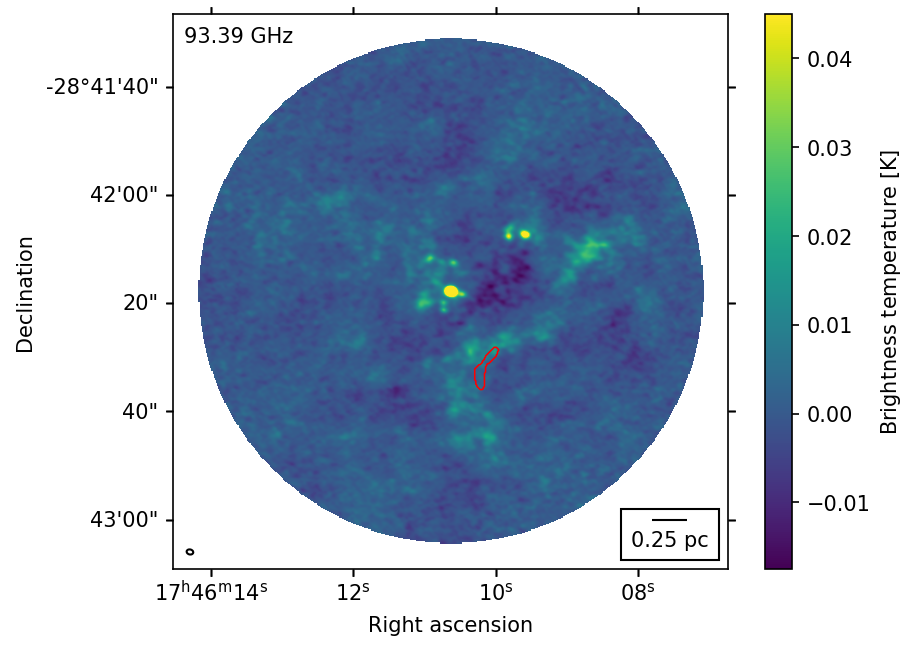

97.42 GHz Beam: BMAJ=1.4106903076171875 arcsec BMIN=1.2057889699935913 arcsec BPA=-63.78419494628906 deg
0.0017904931097838224 deg


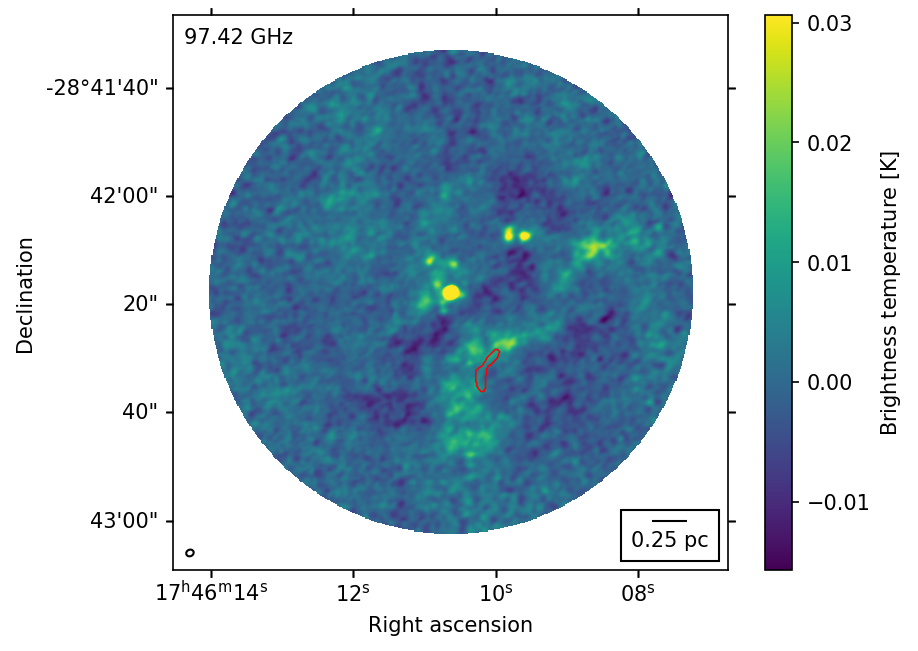

101.39 GHz Beam: BMAJ=1.4899431467056274 arcsec BMIN=1.0774213075637817 arcsec BPA=-67.87051391601562 deg
0.0017904931097838224 deg


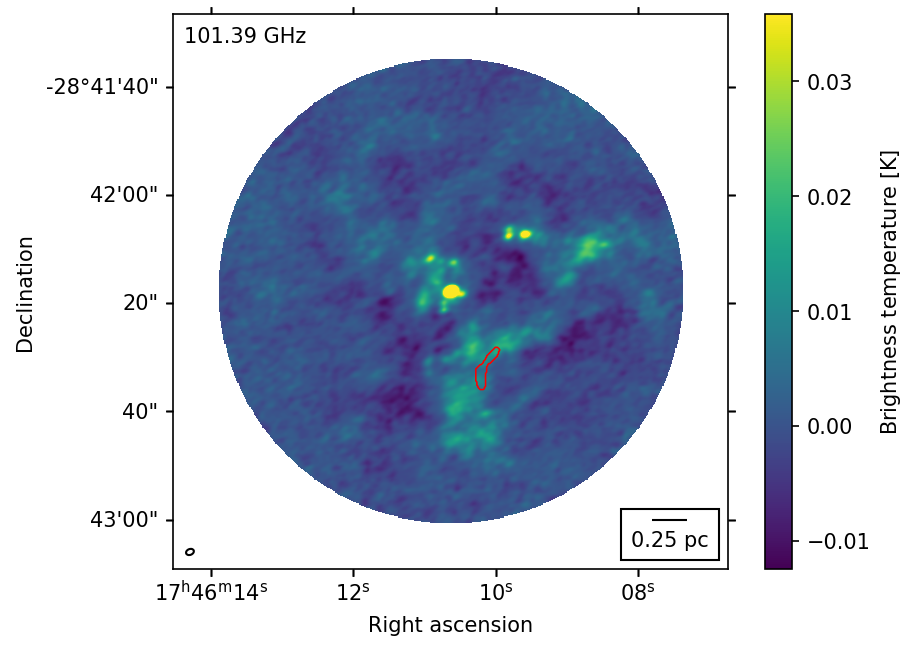

105.31 GHz Beam: BMAJ=1.5314462184906006 arcsec BMIN=1.0390980243682861 arcsec BPA=-78.43946838378906 deg
0.0017904931097838224 deg


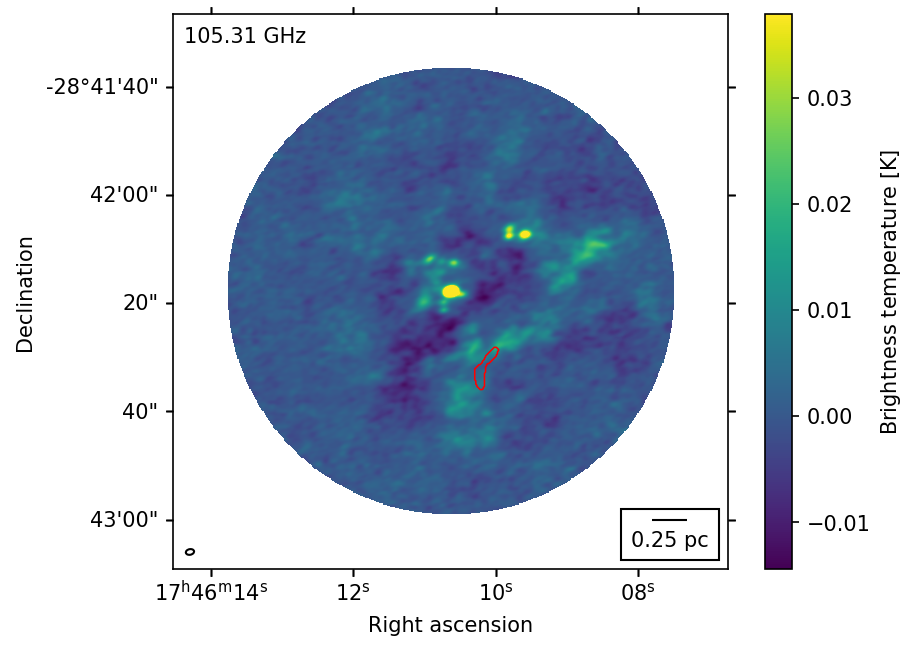

107.62 GHz Beam: BMAJ=1.4527732133865356 arcsec BMIN=1.021068811416626 arcsec BPA=-81.75519561767578 deg
0.0017904931097838224 deg


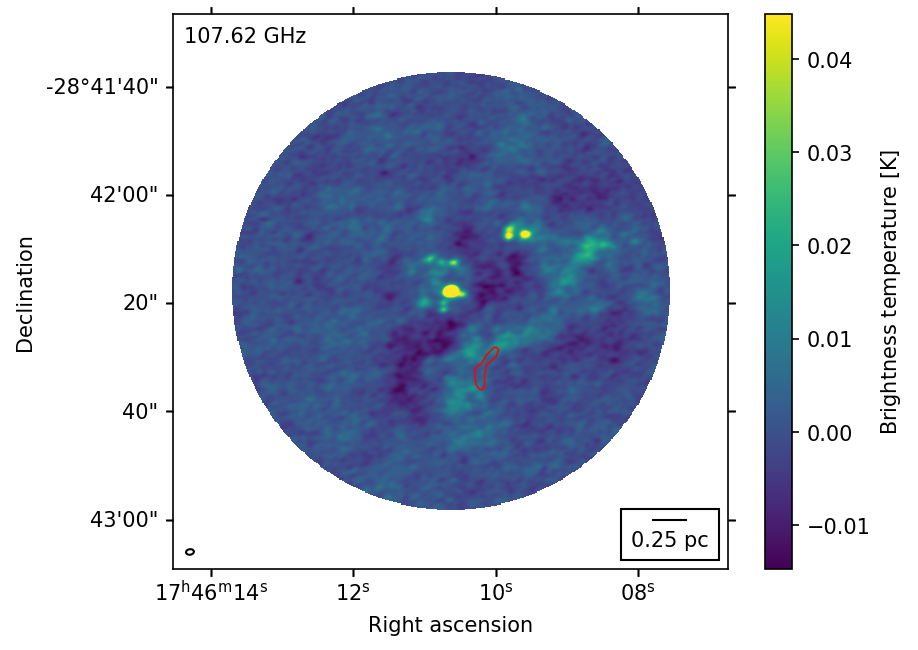

132.85 GHz Beam: BMAJ=1.6419183015823364 arcsec BMIN=1.3000072240829468 arcsec BPA=-83.78289031982422 deg
0.0017904931097838224 deg


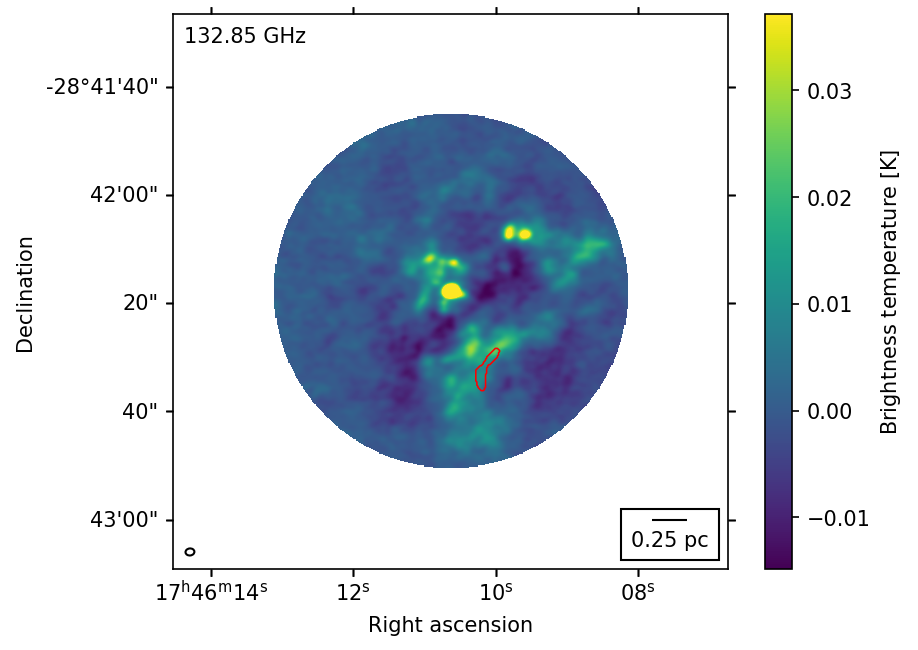

147.33 GHz Beam: BMAJ=1.5256072282791138 arcsec BMIN=1.1991729736328125 arcsec BPA=-84.96701049804688 deg
0.0017904931097838224 deg


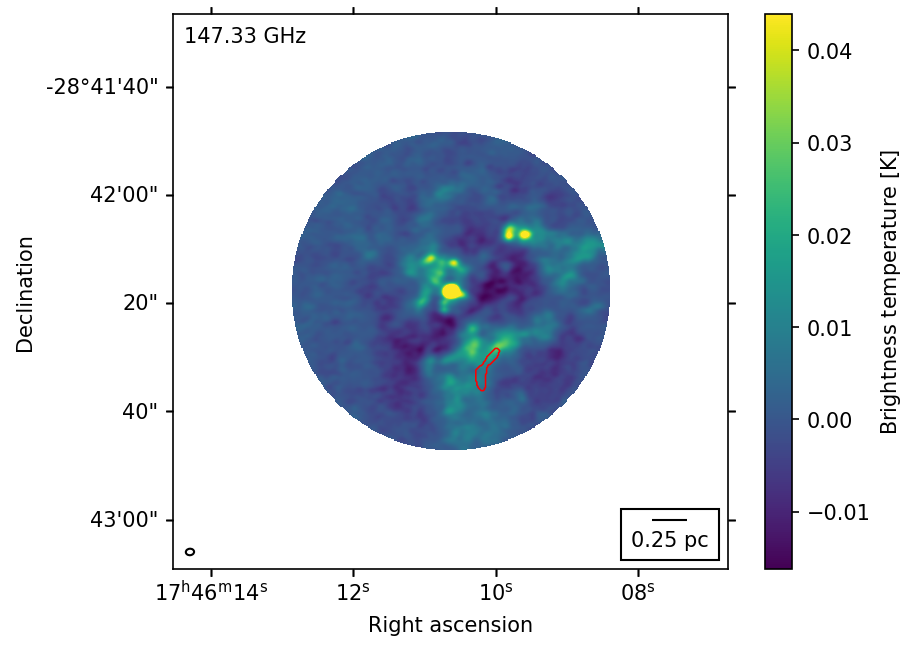

250.41 GHz Beam: BMAJ=1.4189393520355225 arcsec BMIN=1.1567813158035278 arcsec BPA=-73.52104187011719 deg
0.0017904931097838224 deg


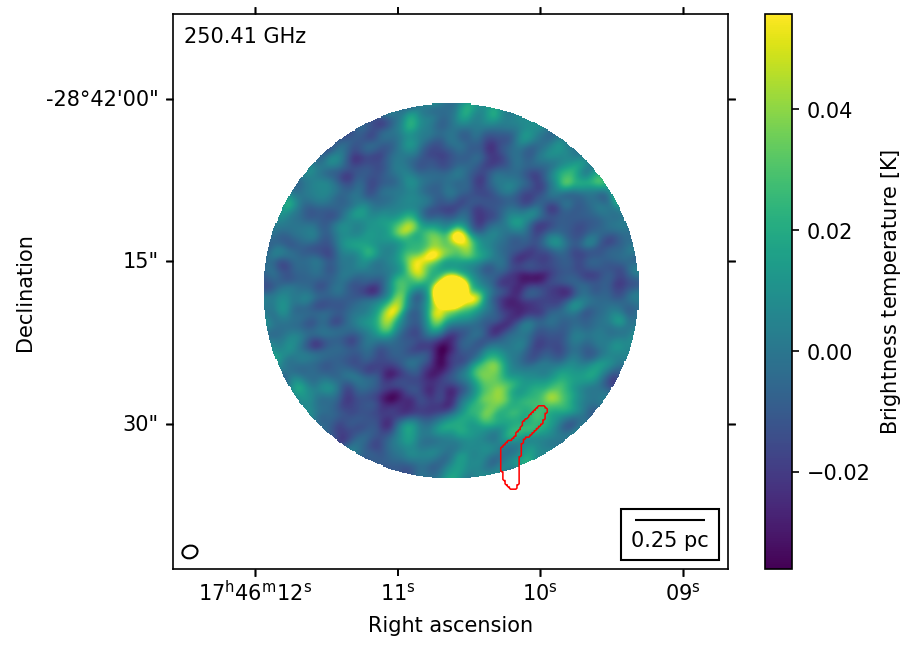

266.94 GHz Beam: BMAJ=1.3399311304092407 arcsec BMIN=1.0909758806228638 arcsec BPA=-73.60033416748047 deg
0.0017904931097838224 deg


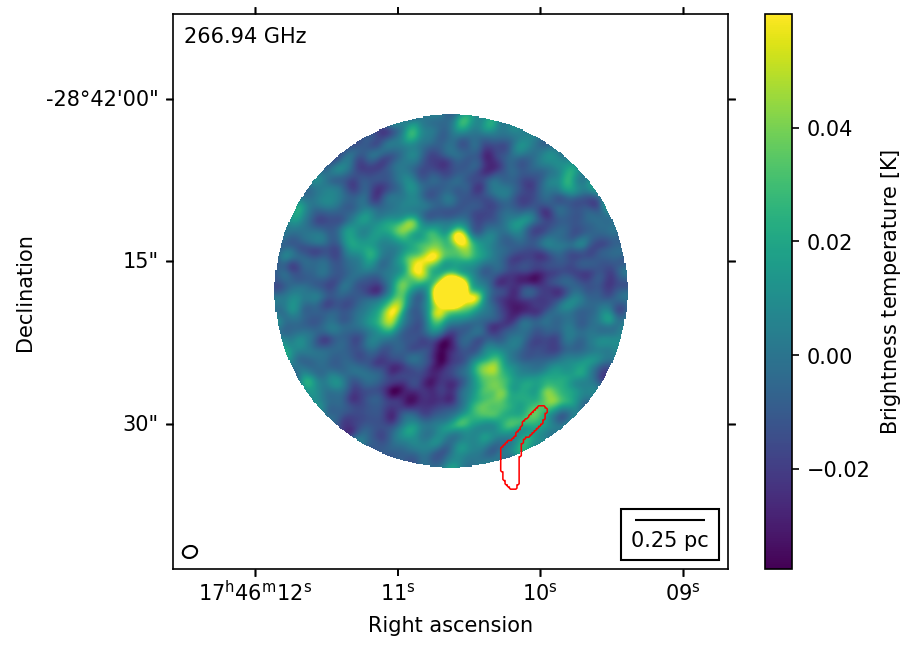

In [5]:
for contimage in contimages_ordered:
    immin = np.nanmin(contimage[0].value)
    immax = np.nanmax(contimage[0].value)
    ax = plt.subplot(111, projection = contimage[0].wcs)
    im = ax.imshow(contimage[0].value, origin = 'lower', cmap='viridis', norm='linear', vmax=0.11*immax, vmin=immin)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f"Brightness temperature [{contimage[0].unit.to_string(format = 'latex_inline')}]")
    ax.set_ylabel('Declination')
    ax.set_xlabel('Right ascension')
    # Add frown contour
    diffreg = fits.open('diffuse_regions.fits')
    diffreg_mask = diffreg[0].data == 1
    array, footprint = reproject_interp((diffreg_mask, diffreg[0].header), contimage[0].wcs.celestial, shape_out=(contimage.shape[1], contimage.shape[2]))
    mask = array == 1
    ax.contour(mask, levels = [0, 1], linewidths=0.75, colors = ['r'])
    # Put beam on each image
    pixscale = np.abs((wcs.utils.proj_plane_pixel_area(contimage[0].wcs)**0.5*u.deg).to(u.arcsec))
    bm = contimage[0].beam
    bmell = bm.ellipse_to_plot(15, 15, pixscale)
    bmell.set_facecolor('none')
    bmell.set_edgecolor('k')
    ax.add_artist(bmell)
    # Add center frequency to plot
    freq = str(round(contimage.spectral_extrema[0].to(u.GHz).value, 2))+' GHz'
    plt.text(0.02, 0.95, freq, transform=ax.transAxes)
    # Print some info
    print(freq, bm)
    # Compute the angle corresponding to 1 pc at the distance of the galactic center
    from astropy.visualization.wcsaxes import add_scalebar
    gc_distance = 8.0*u.kpc
    scalebar_length = 0.25*u.pc
    scalebar_angle = (scalebar_length / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
    print(scalebar_angle)
    # Add a scale bar
    add_scalebar(ax, scalebar_angle, label="0.25 pc", color="black", frame=True)
    plt.savefig(fig_dir+'/'+f'brickmaser_cont_{contimage.spectral_extrema[0].to(u.GHz).value:014.10f}.png', bbox_inches='tight')
    plt.savefig(fig_dir+'/'+f'brickmaser_cont_{contimage.spectral_extrema[0].to(u.GHz).value:014.10f}.pdf', bbox_inches='tight')
    plt.show()

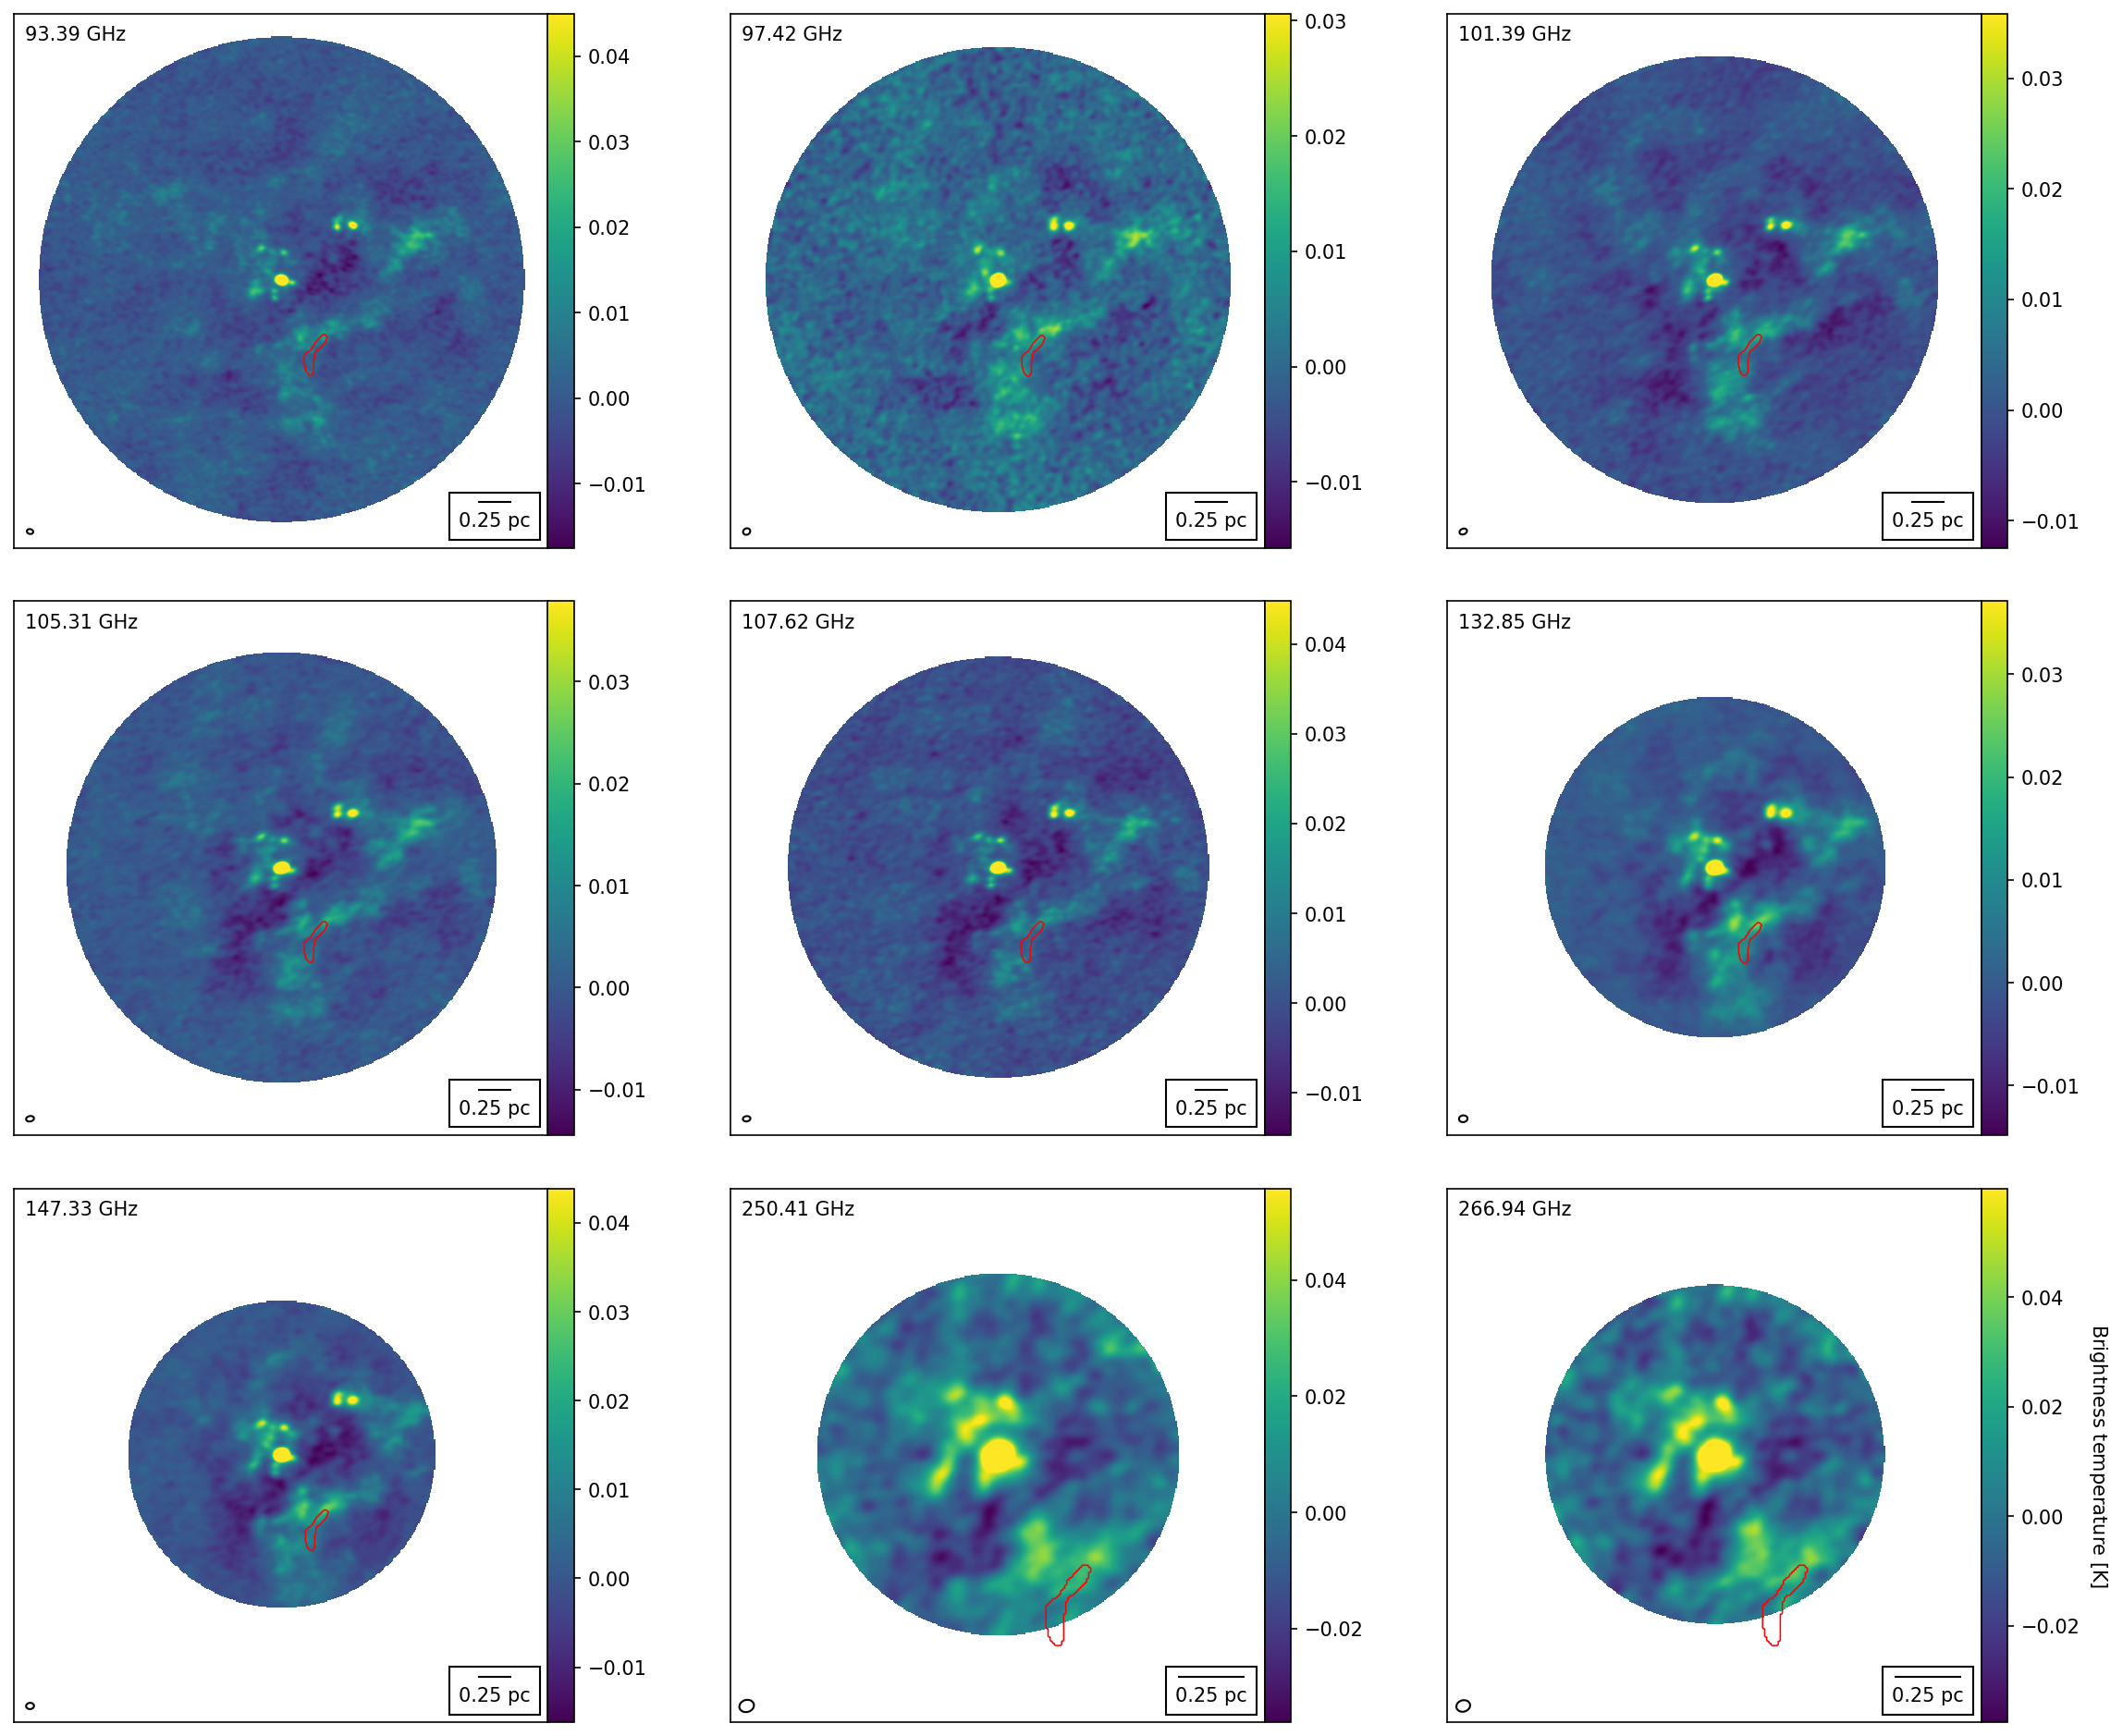

In [61]:
# Make a grid of these for the paper
fig = plt.figure(figsize=(20,16))
gs = fig.add_gridspec(3, 3, hspace=0.1, wspace=0)

i=0
for y in range(0,3):
    for x in range(0,3):
        contimage = contimages_ordered[i]
        ax = fig.add_subplot(gs[y,x], projection=contimage[0].wcs)
        # Get min and max value of image for scaling
        immin = np.nanmin(contimage[0].value)
        immax = np.nanmax(contimage[0].value)
        im = ax.imshow(contimage[0].value, origin='lower', cmap='viridis', norm='linear', vmax=0.11*immax, vmin=immin)
        cbar = plt.colorbar(im, ax=ax, pad=0)
        
#         print(ax.get_xlim())
#         print(ax.get_ylim())
        
#         # Set map size based on larger map
#         if not (x == 0 and y == 0):
#             ax.set_xlim(x_lims)
#             ax.set_ylim(y_lims)
        
        # Remove the absolute coordinates
        ra = ax.coords["ra"]
        dec = ax.coords["dec"]
        ra.set_ticks_visible(False)
        ra.set_ticklabel_visible(False)
        dec.set_ticks_visible(False)
        dec.set_ticklabel_visible(False)
        ra.set_axislabel("")
        dec.set_axislabel("")
        # Create an overlay with relative coordinates
        crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))
        aframe = crd.skyoffset_frame()
        overlay = ax.get_coords_overlay(aframe)
        ra_offset = overlay["lon"]
        dec_offset = overlay["lat"]
        ra_offset.set_axislabel("RA offset (arcsec)")
        dec_offset.set_axislabel("Dec offset (arcsec)")
        ra_offset.set_major_formatter("s.s")
        dec_offset.set_major_formatter("s.s")
        ra_offset.set_ticks_position("bt")
        ra_offset.set_ticklabel_position("b")
        dec_offset.set_ticks_position("lr")
        dec_offset.set_ticklabel_position("l")
        ra_offset.set_axislabel_position("b")
        dec_offset.set_axislabel_position("l")
        ra_offset.coord_wrap = 180 # avoid wrapping
        # Don't put labels on anything but the bottom left corner plot (just ticks)
        # if not (y == 2 and x == 0):
        ra_offset.set_ticklabel_visible(False)
        dec_offset.set_ticklabel_visible(False)
        ra_offset.set_axislabel("")
        dec_offset.set_axislabel("")
        ra_offset.set_ticks_visible(False)
        dec_offset.set_ticks_visible(False)
        # Add brightness temperature label to the colorbar
        if x == 2 and y == 2:
            cbar.set_label(f"Brightness temperature [{contimage[0].unit.to_string(format = 'latex_inline')}]", rotation=270, labelpad=15)
        
        # Add frown contour
        diffreg = fits.open('diffuse_regions.fits')
        diffreg_mask = diffreg[0].data == 1
        array, footprint = reproject_interp((diffreg_mask, diffreg[0].header), contimage[0].wcs.celestial, shape_out=(contimage.shape[1], contimage.shape[2]))
        mask = array == 1
        ax.contour(mask, levels = [0, 1], linewidths=0.75, colors = ['r'])
        
        # Put beam on each image
        pixscale = np.abs((wcs.utils.proj_plane_pixel_area(contimage[0].wcs)**0.5*u.deg).to(u.arcsec))
        bm = contimage[0].beam
        bmell = bm.ellipse_to_plot(15, 15, pixscale)
        bmell.set_facecolor('none')
        bmell.set_edgecolor('k')
        ax.add_artist(bmell)
        
        # Add center frequency to plot
        freq = str(round(contimage.spectral_extrema[0].to(u.GHz).value, 2))+' GHz'
        plt.text(0.02, 0.95, freq, transform=ax.transAxes)

        # if x == 0 and y == 2:
        # Compute the angle corresponding to 1 pc at the distance of the Galactic Center
        from astropy.visualization.wcsaxes import add_scalebar
        gc_distance = 8.0*u.kpc
        scalebar_length = 0.25*u.pc
        scalebar_angle = (scalebar_length / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
        # Add a scale bar
        add_scalebar(ax, scalebar_angle, label="0.25 pc", color="black", frame=True)
        
#         if x == 0 and y == 0:
#             x_lims = ax.get_xlim()
#             y_lims = ax.get_ylim()
        
#         print(x_lims)
#         print(y_lims)
#         print("--------")
        
        i+=1

plt.savefig(fig_dir+'/'+f'brickmaser_cont_map.png', bbox_inches='tight')
plt.savefig(fig_dir+'/'+f'brickmaser_cont_map.pdf', bbox_inches='tight')
plt.show()

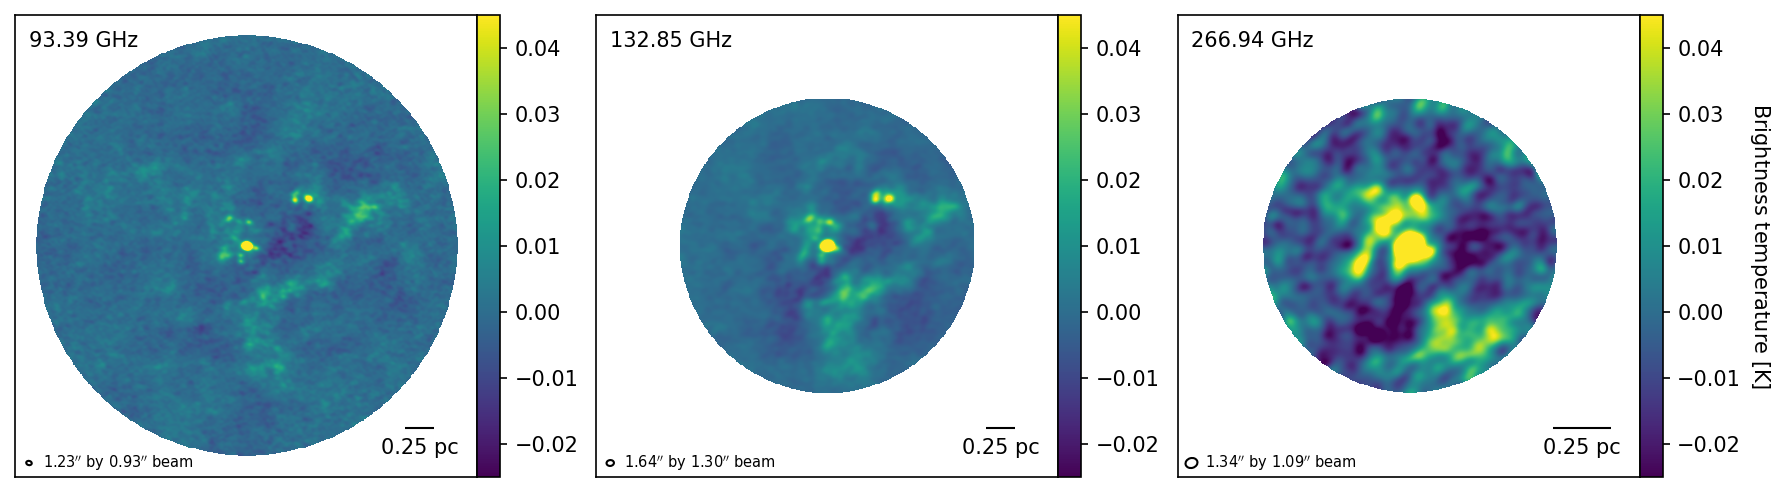

In [92]:
# Make a grid of these for the C12 proposal
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 3, hspace=0.1, wspace=0)

i=0
for x in [0,5,8]:
    contimage = contimages_ordered[x]
    ax = fig.add_subplot(gs[i], projection=contimage[0].wcs)
    # Get min and max value of image for scaling
    immin = np.nanmin(contimage[0].value)
    immax = np.nanmax(contimage[0].value)
    im = ax.imshow(contimage[0].value, origin='lower', cmap='viridis', norm='linear', vmax=0.045, vmin=-0.025)
    cbar = plt.colorbar(im, ax=ax, pad=0)

    # Remove the absolute coordinates
    ra = ax.coords["ra"]
    dec = ax.coords["dec"]
    ra.set_ticks_visible(False)
    ra.set_ticklabel_visible(False)
    dec.set_ticks_visible(False)
    dec.set_ticklabel_visible(False)
    ra.set_axislabel("")
    dec.set_axislabel("")
    # Create an overlay with relative coordinates
    crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))
    aframe = crd.skyoffset_frame()
    overlay = ax.get_coords_overlay(aframe)
    ra_offset = overlay["lon"]
    dec_offset = overlay["lat"]
    ra_offset.set_axislabel("RA offset (arcsec)")
    dec_offset.set_axislabel("Dec offset (arcsec)")
    ra_offset.set_major_formatter("s.s")
    dec_offset.set_major_formatter("s.s")
    ra_offset.set_ticks_position("bt")
    ra_offset.set_ticklabel_position("b")
    dec_offset.set_ticks_position("lr")
    dec_offset.set_ticklabel_position("l")
    ra_offset.set_axislabel_position("b")
    dec_offset.set_axislabel_position("l")
    ra_offset.coord_wrap = 180 # avoid wrapping
    # Don't put labels on anything but the middle plot (just ticks)
    # if not (x == 0):
    ra_offset.set_ticklabel_visible(False)
    dec_offset.set_ticklabel_visible(False)
    ra_offset.set_axislabel("")
    dec_offset.set_axislabel("")
    ra_offset.set_ticks_visible(False)
    dec_offset.set_ticks_visible(False)
    # Add brightness temperature label to the colorbar
    if x == 8:
        cbar.set_label(f"Brightness temperature [{contimage[0].unit.to_string(format = 'latex_inline')}]", rotation=270, labelpad=15)

    # # Add frown contour
    # diffreg = fits.open('diffuse_regions.fits')
    # diffreg_mask = diffreg[0].data == 1
    # array, footprint = reproject_interp((diffreg_mask, diffreg[0].header), contimage[0].wcs.celestial, shape_out=(contimage.shape[1], contimage.shape[2]))
    # mask = array == 1
    # ax.contour(mask, levels = [0, 1], linewidths=0.75, colors = ['r'])

    # Put beam on each image
    pixscale = np.abs((wcs.utils.proj_plane_pixel_area(contimage[0].wcs)**0.5*u.deg).to(u.arcsec))
    bm = contimage[0].beam
    bm_str = f"{bm.major.value:.2f}$''$ by {bm.minor.value:.2f}$''$ beam"
    bmell = bm.ellipse_to_plot(15, 15, pixscale)
    bmell.set_facecolor('none')
    bmell.set_edgecolor('k')
    ax.add_artist(bmell)
    plt.text(0.06, 0.02, bm_str, transform=ax.transAxes, size=7)

    # Add center frequency to plot
    freq = str(round(contimage.spectral_extrema[0].to(u.GHz).value, 2))+' GHz'
    plt.text(0.03, 0.93, freq, transform=ax.transAxes)

    if x in [0,5,8]:
        # Compute the angle corresponding to 1 pc at the distance of the Galactic Center
        from astropy.visualization.wcsaxes import add_scalebar
        gc_distance = 8.0*u.kpc
        scalebar_length = 0.25*u.pc
        scalebar_angle = (scalebar_length / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
        # Add a scale bar
        add_scalebar(ax, scalebar_angle, label="0.25 pc", color="black", frame=False)
        
    i+=1

plt.savefig(fig_dir+'/'+f'brickmaser_cont_map_proposal.png', bbox_inches='tight')
plt.savefig(fig_dir+'/'+f'brickmaser_cont_map_proposal.pdf', bbox_inches='tight')
plt.show()